# 날씨 데이터 예측
- 선형
- 나이브
- 프로핏


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
%config InlineBackend.figure_format = 'retina'

# 데이터
- 날씨 데이터

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/StillWork/data/master/new_weather.csv')
df.shape

(4018, 4)

In [43]:
df

,연월일,기온,품질,균질
0,2006/1/1,3.6,8,1
1,2006/1/2,4.0,8,1
2,2006/1/3,3.7,8,1
3,2006/1/4,4.0,8,1
4,2006/1/5,3.6,8,1
...,...,...,...,...
4013,2016/12/27,11.1,8,2
4014,2016/12/28,6.0,8,2
4015,2016/12/29,4.3,8,2
4016,2016/12/30,6.0,8,2


In [44]:
def split_seq(data, n_steps):
    x, y = [], []
    for i in range(len(data)):
        if i > len(data) - n_steps - 1 : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [46]:
data = [1,2,3,4,5,6,7,8,9,10]
x_train,y_train = split_seq(data, 7)
list(zip(x_train, y_train))

[(array([1, 2, 3, 4, 5, 6, 7]), 8),
 (array([2, 3, 4, 5, 6, 7, 8]), 9),
 (array([3, 4, 5, 6, 7, 8, 9]), 10)]

In [48]:
type(df["기온"])

pandas.core.series.Series

In [50]:
y = df["기온"].values # train_test_split 사용하면 안됨 !!
ratio = 0.75
cut = np.int(len(y)*ratio)
train = y[:cut]
test = y[cut:]
len(train), len(test)

(3013, 1005)

In [52]:
train[:10]

array([3.6, 4. , 3.7, 4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3])

# 선형 예측

In [54]:
lr = LinearRegression()
for i in range(1,14): 
    n_steps=i
    x_train, y_train = split_seq(train, n_steps)
    x_test, y_test = split_seq(test, n_steps)
    lr.fit(x_train, y_train) 
    print(n_steps, lr.score(x_test, y_test).round(4)) # R2 점수

1 0.9279
2 0.9284
3 0.9318
4 0.933
5 0.9333
6 0.9345
7 0.9349
8 0.9356
9 0.9355
10 0.936
11 0.9361
12 0.9361
13 0.936


## 최적값 선택

10 0.9359804760059094


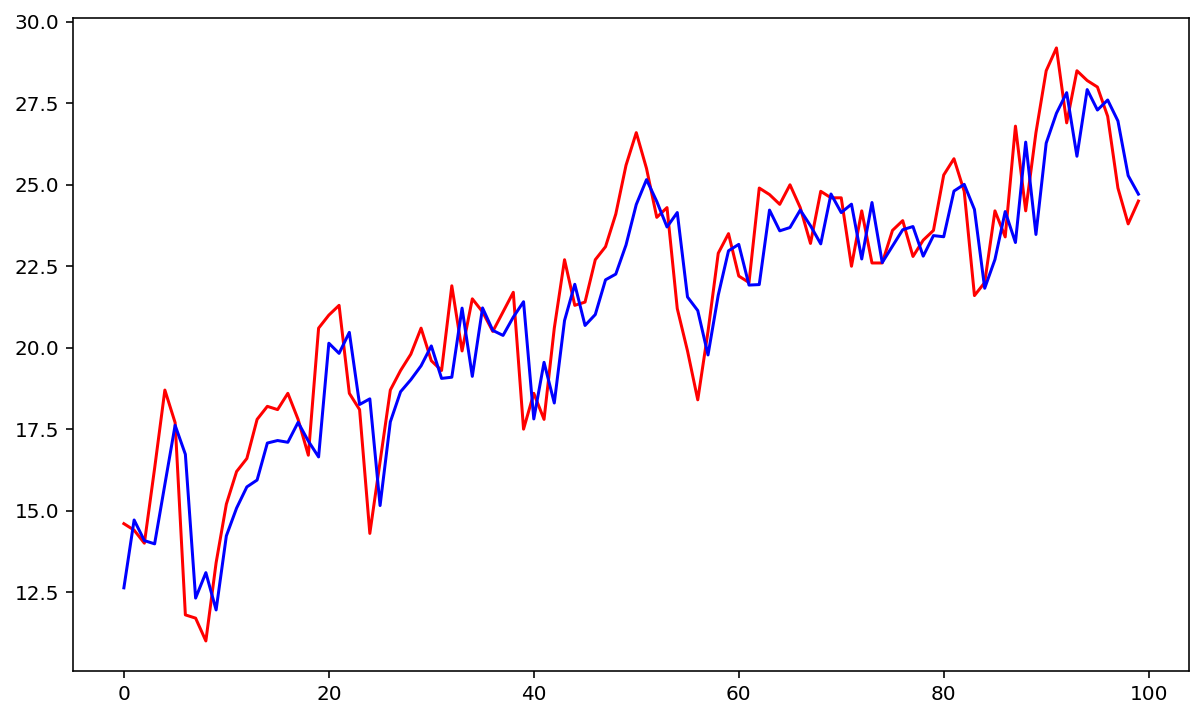

In [55]:
lr = LinearRegression()

# 최적값 사용 n_steps = 10, 윈도오 크기

n_steps = 10
x_train, y_train = split_seq(train, n_steps)
x_test, y_test = split_seq(test, n_steps)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)
print(n_steps, lr.score(x_test, y_test)) # R2

# 결과 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], c='r')
plt.plot(y_pred[:100], c='b')
plt.show()

In [56]:
error = np.abs(y_pred  - y_test)
print("MAE=", error.mean())
print("max=", max(error))
print("R2=",lr.score(x_test, y_test)) # R2

MAE= 1.497897124679352
max= 8.613561682545189
R2= 0.9359804760059094


# 나이브 모델

In [57]:
def naive_model(x_seq):
    return np.array(x_seq).mean(axis=1)

In [58]:
x_test, y_test = split_seq(test, 1) # persistent 모델
# m.fit(x_train, y_train)
y_pred = naive_model(x_test)
print(r2_score(y_test, y_pred))

0.9266048196593487


In [60]:
error = np.abs(y_pred  - y_test)
print("MAE=", error.mean())
print("max=", max(error))
# print("R2=",lr.score(x_test, y_test)) # R2

MAE= 1.5845617529880478
max= 10.4


## naive  모델에서 최적의 윈도우 크기
- 과거의 평균치로 예측하는 경우를 가정
- Baseline 모델, 새로운 모델은 이것보다는 좋아야 하는 기준

In [63]:
for i in range(1,20): 
    n_steps=i
#   x_train, y_train = split_seq(train, n_steps)
    x_test, y_test = split_seq(test, n_steps)
    y_pred = naive_model(x_test)
    r2_score(y_test, y_pred)
    print(n_steps, r2_score(y_test, y_pred).round(4))

1 0.9266
2 0.9166
3 0.9113
4 0.9074
5 0.9037
6 0.901
7 0.8991
8 0.8982
9 0.8971
10 0.896
11 0.8948
12 0.8932
13 0.8913
14 0.8897
15 0.888
16 0.8861
17 0.8841
18 0.8812
19 0.8778


# Prophet 사용

In [64]:
!pip install fbprophet

In [22]:
from fbprophet import Prophet

In [27]:
df

,연월일,기온,품질,균질
0,2006/1/1,3.6,8,1
1,2006/1/2,4.0,8,1
2,2006/1/3,3.7,8,1
3,2006/1/4,4.0,8,1
4,2006/1/5,3.6,8,1
...,...,...,...,...
4013,2016/12/27,11.1,8,2
4014,2016/12/28,6.0,8,2
4015,2016/12/29,4.3,8,2
4016,2016/12/30,6.0,8,2


In [28]:
df = df.drop(["품질", "균질"], axis=1)

In [29]:
df.columns = ['ds', 'y']
df

,ds,y
0,2006/1/1,3.6
1,2006/1/2,4.0
2,2006/1/3,3.7
3,2006/1/4,4.0
4,2006/1/5,3.6
...,...,...
4013,2016/12/27,11.1
4014,2016/12/28,6.0
4015,2016/12/29,4.3
4016,2016/12/30,6.0


In [30]:
df.ds = df.ds.apply(pd.to_datetime)

In [31]:
df.ds

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4013   2016-12-27
4014   2016-12-28
4015   2016-12-29
4016   2016-12-30
4017   2016-12-31
Name: ds, Length: 4018, dtype: datetime64[ns]

In [33]:
train = df[:3000]
test = df[3000:]
train.shape, test.shape

((3000, 2), (1018, 2))

In [34]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future_test = test.drop('y',axis=1);future_test

,ds
3000,2014-03-20
3001,2014-03-21
3002,2014-03-22
3003,2014-03-23
3004,2014-03-24
...,...
4013,2016-12-27
4014,2016-12-28
4015,2016-12-29
4016,2016-12-30


In [36]:
forecast = model.predict(future_test)

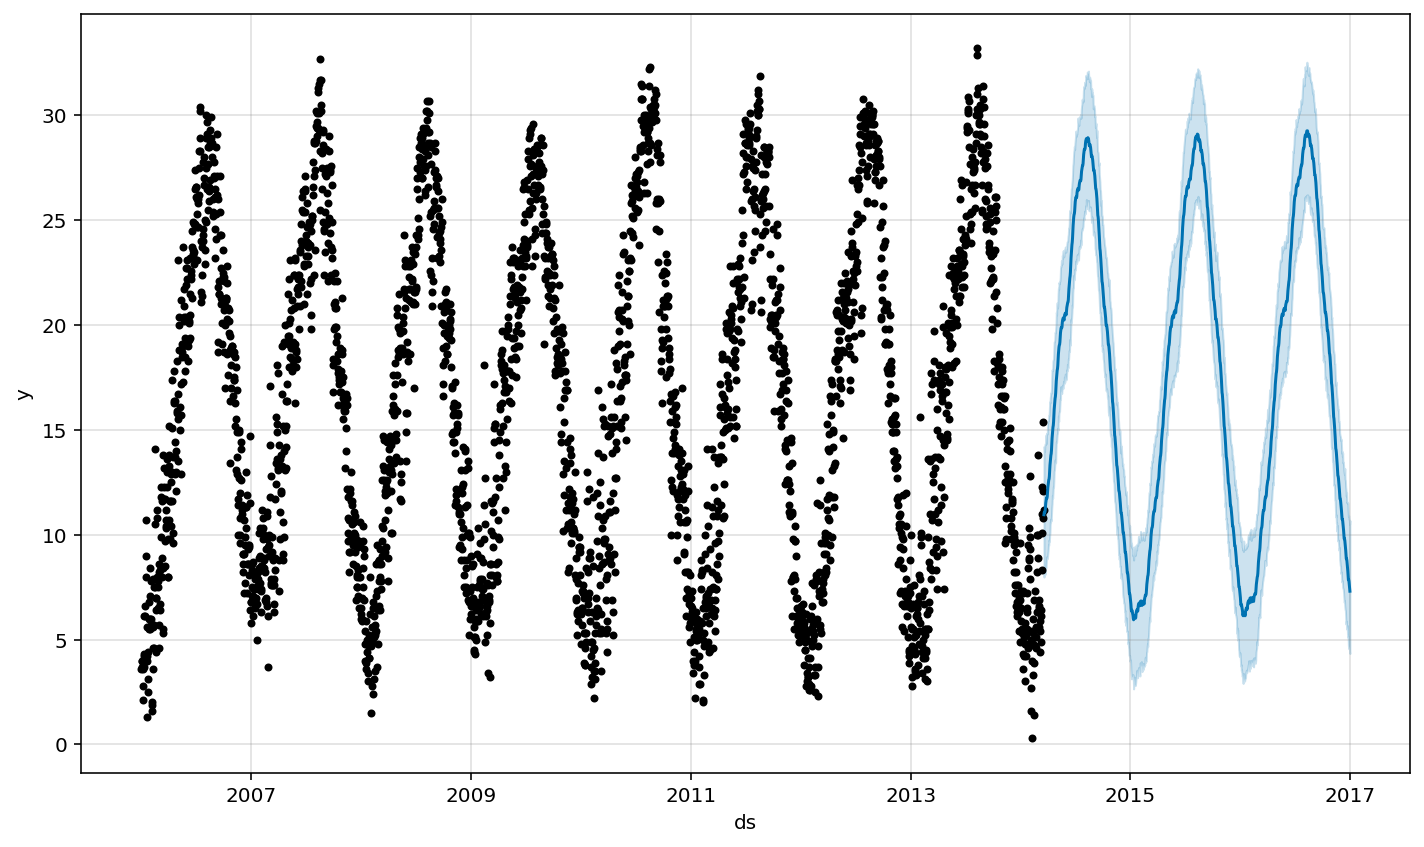

In [37]:
model.plot(forecast); plt.show()

In [38]:
y_pred = forecast['yhat'].values
y_pred.shape

(1018,)

In [39]:
y_test = test.y.values
y_test.shape

(1018,)

In [40]:
r2_score(y_test, y_pred)

0.8833241104358059

# 라이브러리

In [ ]:
cut = np.int((len(ys)*0.7))
train = ys[:cut]
test = ys[cut:]
ys.shape, train.shape, test.shape, cut

In [ ]:
def split_seq_2(sequence, n_steps_in, n_steps_out=1):
  x, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [ ]:
# 실제값과 예측치 비교
def plot_y_pred(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test, c='r')
    plt.plot(y_pred, c='b')
    plt.show()
    print("R2=", r2_score(y_test, y_pred).round(3))
    error = abs(y_test - y_pred)
    print("MAE=", error.mean().round(3))
    print("rmse=", np.sqrt((error**2).mean()).round(3))
    print("max=", max(error).round(3))

In [ ]:
def scatter_errors(y_test, y_pred):
    error = abs(y_test - y_pred)
    plt.scatter(y_test, error, s=2)

In [ ]:
lr = LinearRegression()
n_steps_in = 3
n_futures = range(10)
for n_steps_out in n_futures:
  x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
  x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
  lr.fit(x_train, y_train) 
  print(n_steps_out, ',', lr.score(x_test, y_test).round(3))